<a href="https://colab.research.google.com/github/suhani-7-0/Game-Development/blob/main/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 style="color:green" align="center">Predicting if a person would buy life insurnace based on his age using logistic regression</h2>

Above is a binary logistic regression problem as there are only two possible outcomes (i.e. if person buys insurance or he/she doesn't).

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/hirdeshiitkgp/Data/refs/heads/main/insurance_data.csv")
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


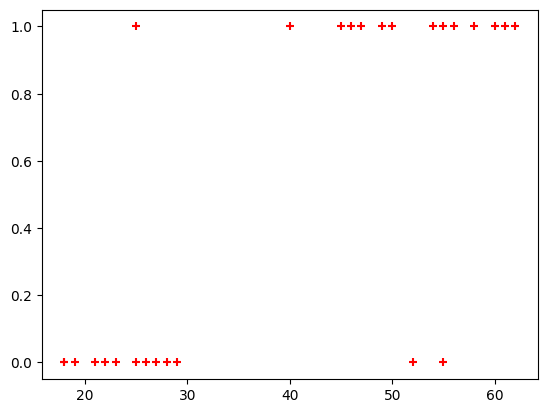

In [ ]:
plt.scatter(df.age,df.bought_insurance,marker='+',color='red')

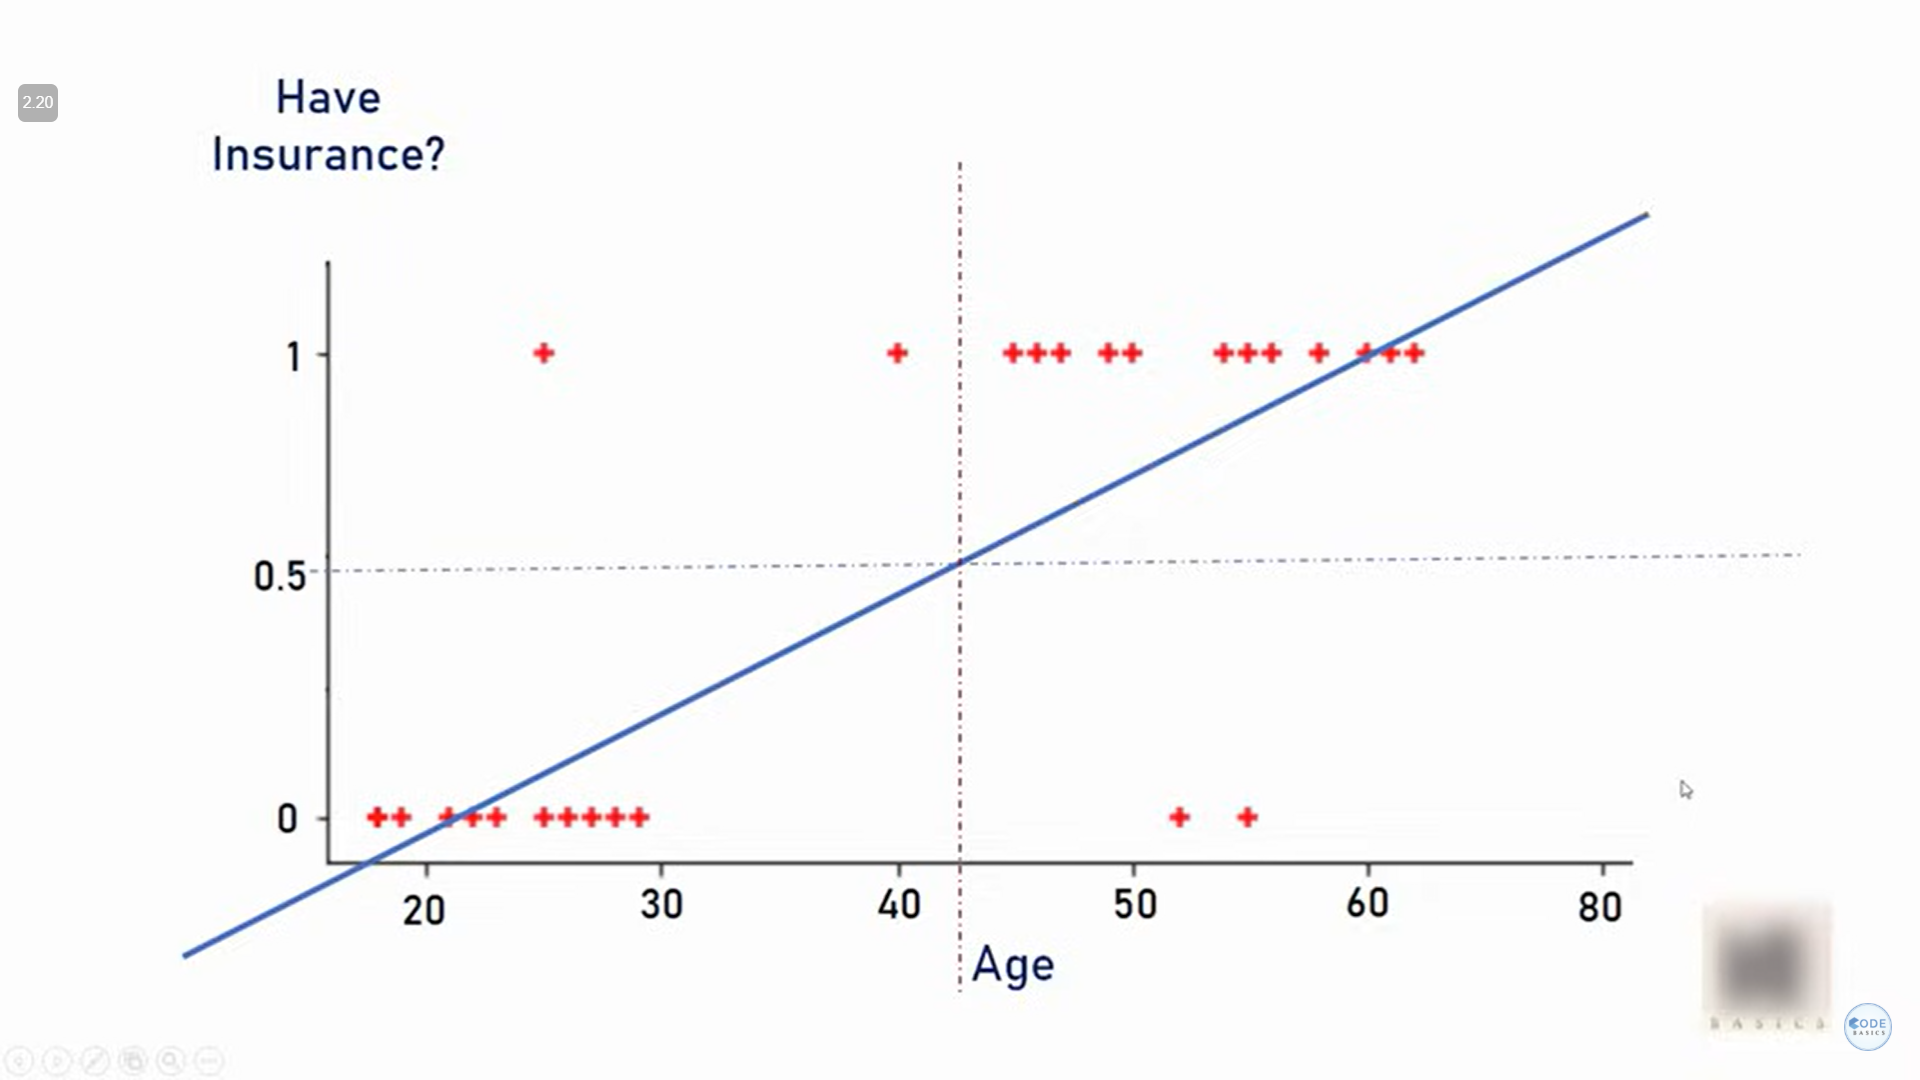

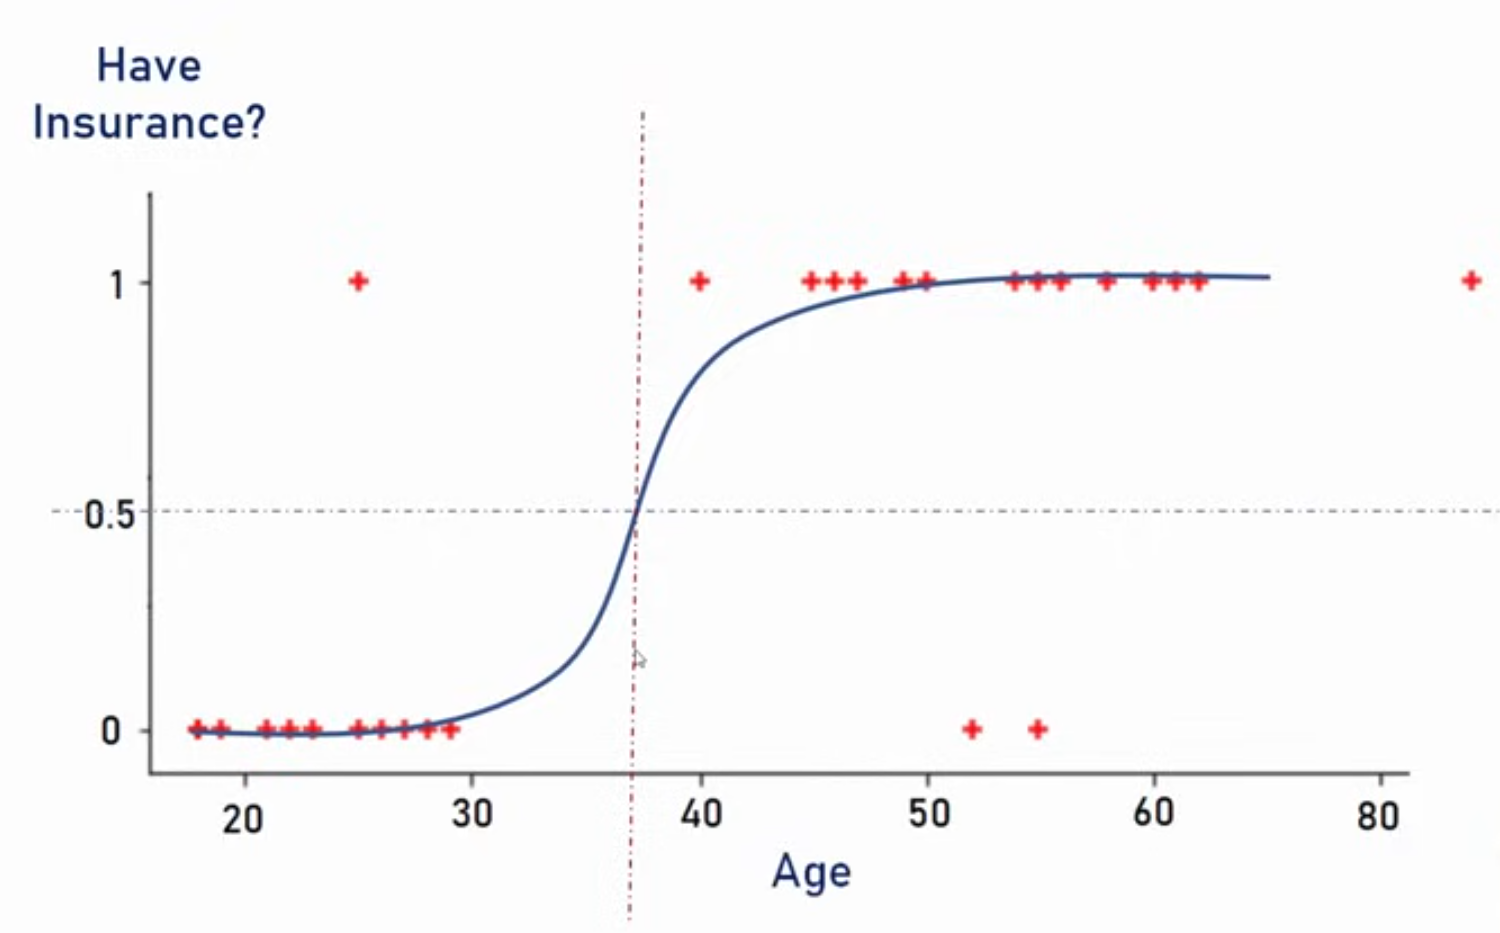

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance,train_size=0.8, random_state=42)

In [ ]:
X_test

,age
8,62
13,29
9,61
21,26
0,22
11,28


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
X_test

,age
8,62
13,29
9,61
21,26
0,22
11,28


In [ ]:
y_predicted = model.predict(X_test)
y_predicted

array([1, 0, 1, 0, 0, 0])

In [ ]:
model.predict_proba(X_test)

array([[0.05428672, 0.94571328],
       [0.7055532 , 0.2944468 ],
       [0.06039333, 0.93960667],
       [0.77084966, 0.22915034],
       [0.84096469, 0.15903531],
       [0.72848723, 0.27151277]])

In [ ]:
model.score(X_test,y_test)

1.0

In [ ]:
y_predicted

array([1, 0, 1, 0, 0, 0])

In [ ]:
X_test

,age
8,62
13,29
9,61
21,26
0,22
11,28


**model.coef_ indicates value of m in y=m*x + b equation**

In [ ]:
model.coef_

array([[0.11307708]])

**model.intercept_ indicates value of b in y=m*x + b equation**

In [ ]:
model.intercept_

array([-4.15311919])

**Lets defined sigmoid function now and do the math with hand**

In [ ]:
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [ ]:
def prediction_function(age):
    z = 0.11 * age - 4.15 # 0.11 and -4.15
    y = sigmoid(z)
    return y

In [ ]:
age = 35
prediction_function(age)

0.4255574831883409

**0.485 is less than 0.5 which means person with 35 age will *not* buy insurance**

In [ ]:
age = 43
prediction_function(age)

0.6410674063348171

**0.485 is more than 0.5 which means person with 43 will buy the insurance**

Download the Employee Retention dataset from the following link: https://www.kaggle.com/giripujar/hr-analytics.

Begin by performing exploratory data analysis (EDA) to identify which variables have a clear and direct impact on employee retention (i.e., whether an employee stays or leaves the company).

- Create bar charts to visualize the relationship between employee salary levels and retention.

- Create bar charts to analyze how different departments correlate with employee retention.

Next, build a logistic regression model using the most relevant variables identified during the EDA.
Finally, evaluate the model's performance by calculating its accuracy.

<h2 style='color:blue' align="center">Logistic Regression: Multiclass Classification</h2>

In this tutorial we will see how to use logistic regression for multiclass classification.

In [ ]:
from sklearn.datasets import load_digits
%matplotlib inline
import matplotlib.pyplot as plt
digits = load_digits()

<Figure size 640x480 with 0 Axes>

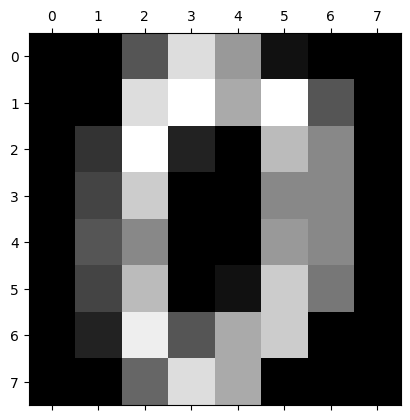

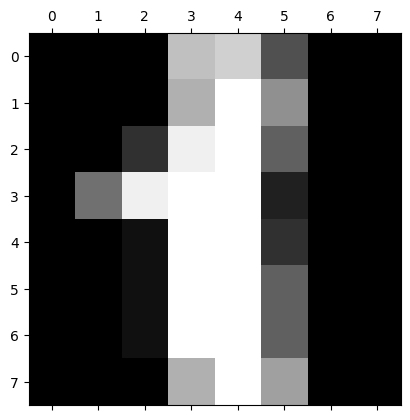

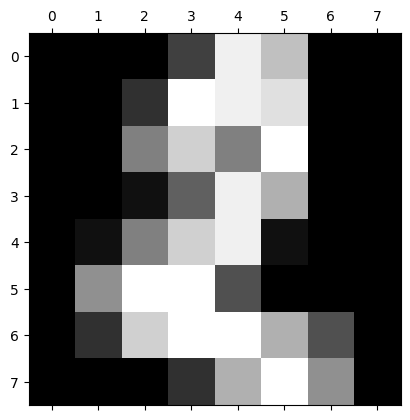

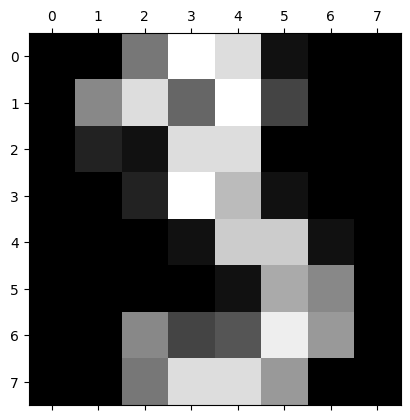

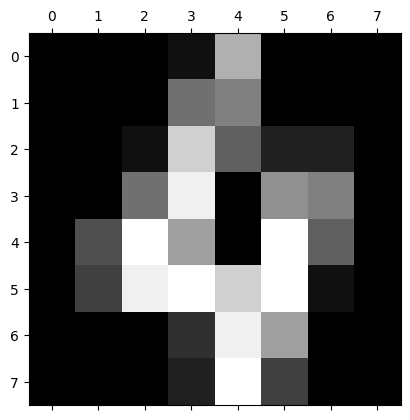

In [ ]:
plt.gray()
for i in range(5):
    plt.matshow(digits.images[i])

In [ ]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [ ]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<h4 style='color:purple'>Create and train logistic regression model</h4>

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
# (multi_class='multinomial', solver='lbfgs', max_iter=200)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target, test_size=0.2)

In [ ]:
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

<h4 style='color:purple'>Measure accuracy of our model</h4>

In [ ]:
model.score(X_test, y_test)

0.9666666666666667

In [ ]:
model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

<h4 style='color:purple'>Confusion Matrix</h4>

In [ ]:
y_predicted = model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[45,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 35,  0,  1,  0,  0,  0,  0,  0,  1],
       [ 0,  0, 35,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 37,  0,  2,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 29,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  1, 38,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 36,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 35,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  0, 28,  1],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0, 30]])

Text(95.72222222222221, 0.5, 'Truth')

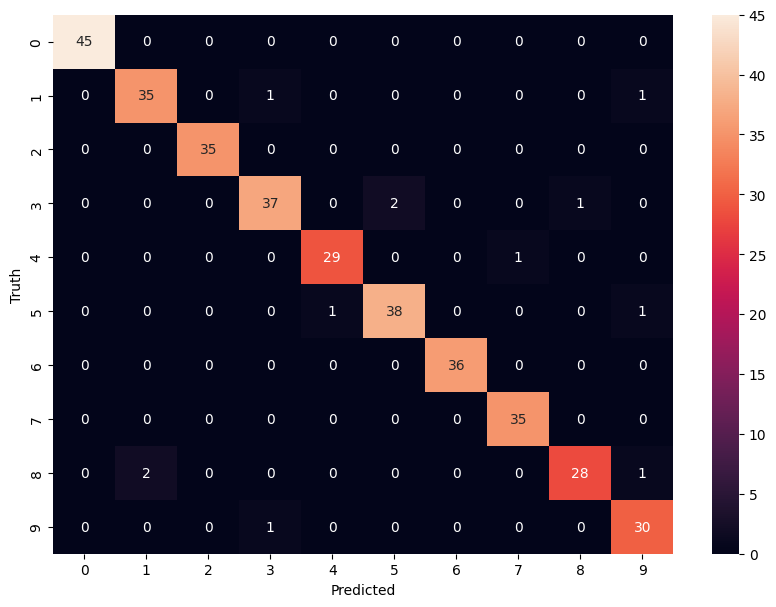

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

**Exercise**

Use the Iris flower dataset from sklearn.datasets to train a logistic regression model. The dataset contains 150 samples, each with the following four features:

- Sepal Length
- Sepal Width
- Petal Length
- Petal Width

Based on these features, the task is to classify each flower into one of the three species:

- Setosa
- Versicolour
- Virginica

You need to:
- Train the model using logistic regression.
- Evaluate the model by calculating its accuracy.
- Use the trained model to make predictions on the test data.